In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
def get_data_from_file(ticker):
    f_name = ticker + ".csv"
    df = pd.read_csv(f_name, delimiter=",")
    return df
def compute_average(num_list):

    count = len(num_list)
    total = 0

    for i in range(0,count):
        total = total + num_list[i]

    avg = total/count

    return avg

In [2]:
#Task 1
def compute_mean_sigma(ticker):
    data = get_data_from_file(ticker)
    adj_close = data['Adj Close']
    relative_change = []
    for i in range(1,22):
        relative_change.append((adj_close[i]-adj_close[i-1])/adj_close[i-1])
    mu = compute_average(relative_change)
    diff_from_mean = (np.array(relative_change)-mu)**2
    sigma = math.sqrt(sum(diff_from_mean)/(len(diff_from_mean)-1))
    answer = [mu,sigma]
    return answer
compute_mean_sigma('AAPL')
#They are the same as answers in Google Sheet

[-0.0012131200159145126, 0.00925301737572726]

In [3]:
#Task 2
def random_daily_returns(s,mu,sigma):
    R = np.random.uniform(0,1)
    delta = (s*mu) + (s*sigma*R)
    return s + delta
random_daily_returns(2,0,1)
random_daily_returns(2,0,1)
#The new stock prices are different in every trial. Therefore,the outcomes are randomly produced.

3.4588567258658003

In [4]:
#Task 3
def random_stock_year(s,mu,sigma):
    a = [s]*252
    for i in range(1,252):
        a[i] = random_daily_returns(a[i-1],mu,sigma)
    return a
random_stock_year(2,-0.1,0.2)

[2,
 2.0535597549026887,
 2.172711620056521,
 2.1434326342326253,
 2.010554837727885,
 1.8139771206360047,
 1.9641340704854906,
 2.0847850272094406,
 2.126323586039833,
 1.9137634793567406,
 2.0813644589297833,
 2.076625408728488,
 2.090739998473799,
 2.1372178641268094,
 1.99394079376276,
 2.045461191191676,
 2.240779260702423,
 2.258602590307966,
 2.2239654207721062,
 2.1770369196544395,
 1.9662612129861368,
 2.036778481184808,
 1.8639794783076706,
 1.8066574067381862,
 1.8606138486405526,
 1.960757224807483,
 1.981430405774065,
 1.795967397480757,
 1.956089516100011,
 1.9103373064031586,
 2.0569778803292165,
 2.0995671039305184,
 1.9373064617481832,
 1.79600490683442,
 1.887554159780375,
 1.7694411053285035,
 1.8656381074497128,
 2.039280050874436,
 2.090843140659484,
 2.1364898773174237,
 2.017531861232129,
 1.9918136091605176,
 1.7986015042650194,
 1.9460421919855106,
 1.7921752373296116,
 1.8118549237999184,
 1.864639879410941,
 1.8662886729485963,
 1.8777080445195433,
 1.9973090

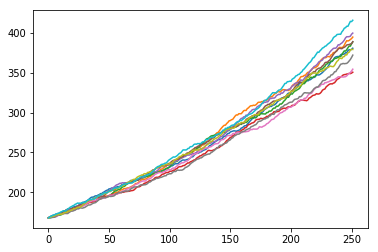

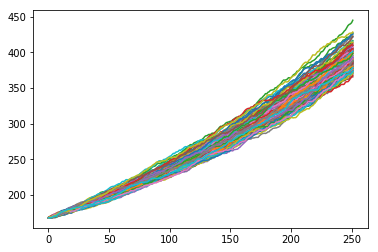

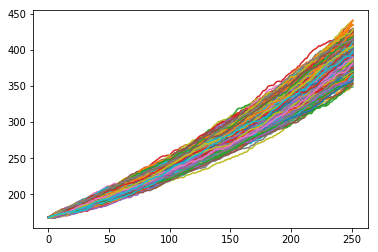

In [5]:
#Task 4
def monyhall_simulation(tickle,number):
    data = get_data_from_file(tickle)
    muu = compute_mean_sigma(tickle)[0]
    sigmaa = compute_mean_sigma(tickle)[1]
    for i in range(number):
        l = random_stock_year(s=data['Adj Close'].iloc[-1],mu=muu,sigma=sigmaa)
        plt.plot(l)
    return plt.show()
monyhall_simulation('AAPL',10)
monyhall_simulation('AAPL',100)    
monyhall_simulation('AAPL',1000)

In [16]:

def inputvariable():
    ticket = input("input ticket:").split(",") 
    year = input("input simulation year:")
    verify = True
    for i in ticket:
        if i not in ['AAPL', 'GOOG', 'AMZN']:
            print("stock not in the list")
            verify = False          
    if int(year) <= 0 :
        print("year should be larger than 0")
        verify = False
    return ticket,year,verify

def stocksimulation():   
        ticket,year,verify = inputvariable()
        if verify == False:
            print("error")       
        else:
            try:
                for i in ticket:
                    for j in range(int(year)):
                        this_ticket = i
                        Mu = compute_mean_sigma(this_ticket)[0]
                        Sigma = compute_mean_sigma(this_ticket)[1]
                        s = list(get_data_from_file(this_ticket)['Adj Close'])[-1]
                        p = random_stock_year(s,Mu,Sigma)
                        plt.plot(p)
                plt.xlabel("year")
                plt.ylabel("price")
                plt.show()
            except:
                print("Got value error = ",ValueError)
            finally:
                print("finish")      

input ticket:AAPL
input simulation year:100


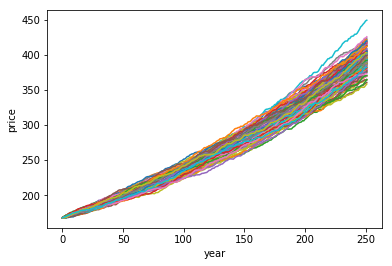

finish


In [17]:
stocksimulation()

In [18]:
stocksimulation()

input ticket:A
input simulation year:100
stock not in the list
error


In [20]:
stocksimulation()

input ticket:AAPL
input simulation year:0
year should be larger than 0
error


input ticket:AAPL,GOOG
input simulation year:100


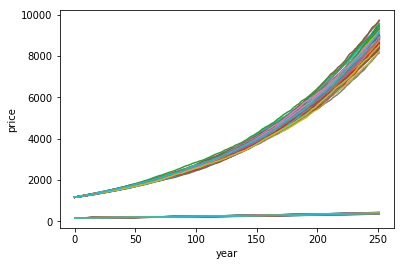

finish


In [19]:
stocksimulation()